In [34]:
import obspy as obs
from glob import glob
import numpy as np
import sys
import os
from obspy import read
import matplotlib.pyplot as plt
np.set_printoptions(suppress = True)
from IPython.display import clear_output

In [25]:
cc_matrix = np.zeros([29412, 5+1201]) # length of traces is 1201 each... and first 5 values will serve as headers
a = 0

for i in np.arange(172):
    for j in np.arange(172):
        if i != j:
            cc_matrix[a,0] = a+1
            cc_matrix[a,1] = i+1
            cc_matrix[a,2] = j+1
            a +=1
        
        else:
            continue

In [26]:
corlist = glob('MAY2014/2014.05.month/DATA/correlations/noisy/*.SAC')

In [36]:
freqmin=0.55
freqmax=0.95
corners=3

for file in corlist[0:5]:
    clear_output()
    a = int(file.split('\\')[1].split('.')[1])
    b = int(file.split('\\')[1].split('.')[5])
    #print(a)
    #print(b)
    
    # find the index that corresponds to the receiver pair
    index = np.where((cc_matrix[:,1] == a) & (cc_matrix[:,2] == b))[0][0]
    print(index)
    index_r = np.where((cc_matrix[:,1] == b) & (cc_matrix[:,2] == a))[0][0]
    print(index_r)
    
    # read in the cc data and filter
    cc_data = read(file)
    cc_data.taper(max_percentage = 0.02, type = 'cosine')
    cc_data.filter(type='bandpass',freqmin=freqmin,freqmax=freqmax,corners=corners,zerophase=True)
    
    # include some additional header information on distance and azimuth, and then include data
    cc_matrix[index,3] = cc_data[0].stats['sac']['dist']
    cc_matrix[index,4] = cc_data[0].stats['sac']['az']
    cc_matrix[index,5:]   = cc_data[0].data
    
    # do the same for the reverse pair - redundant ones
    cc_matrix[index_r,3] = cc_data[0].stats['sac']['dist']
    if cc_data[0].stats['sac']['az'] + 180 > 360:
        cc_matrix[index_r,4] = cc_data[0].stats['sac']['az'] - 180
    else:
        cc_matrix[index_r,4] = cc_data[0].stats['sac']['az'] + 180
    cc_matrix[index_r,5:] = np.flip(cc_data[0].data)


4
855


In [29]:
cc_matrix[4,0:10]

array([   5.        ,    1.        ,    6.        ,  249.89549255,
        212.22116089,    0.01248095,    0.01696116,    0.02082099,
          0.02367768,    0.02518205])

In [31]:
len(cc_matrix[855,5:])

1201

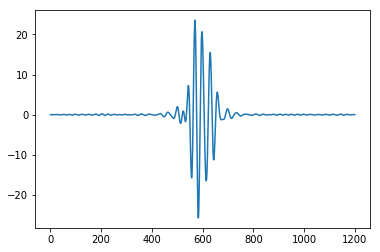

In [32]:
plt.plot(cc_matrix[855,5:])

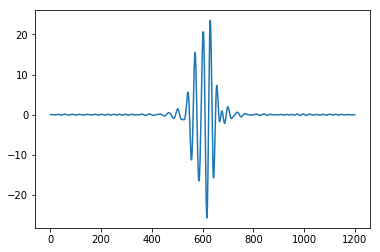

In [15]:
plt.plot(cc_matrix[4,3:])

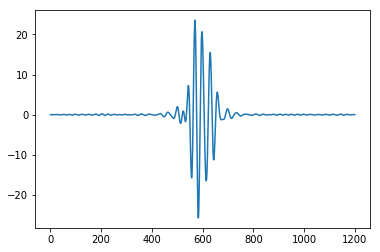

In [16]:
plt.plot(cc_matrix[855,3:])

In [17]:
np.where((cc_matrix[:,1] == 172) & (cc_matrix[:,2] == 171))[0][0]

29411

In [8]:
cc_matrix

array([[     1.,      1.,      2.],
       [     2.,      1.,      3.],
       [     3.,      1.,      4.],
       ..., 
       [ 29410.,    172.,    169.],
       [ 29411.,    172.,    170.],
       [ 29412.,    172.,    171.]])

In [23]:
corlist[0:5]

[]

In [24]:
corlist1 = glob('MA)

In [26]:
corlist1

[]

In [21]:
for file in corlist:
    test_data = read(file)
    assert(test_data[0].stats['sac']['user0'] == 10351)